# TESS EB Validation

In [1]:
from importlib import reload
import pandas as pd

import tesseb_tce_meta as ttm
import tesseb_validate_catalog as tvc

from IPython.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

In [2]:
reload(ttm)
reload(tvc)

df_cat = tvc.load_tesseb_validate_catalog()
len(df_cat)

4584

## Validation: NEB

- check the centroid offsets from matching TCE to see if a TESS EB entry is possibly NEB

Num. samples: 4584
Num. samples with matching TCE1: 2890
Num. samples with TicOffset > 3σ: 503
Num. samples with TicOffset > 3σ and Tmag > 7 (NEB red flag): 465
Percent matched samples with NEB red flag: 16.1% (465 / 2890)


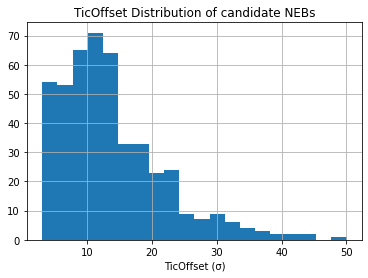

In [3]:
df = df_cat
df = df[~pd.isna(df["num_tces"])]  # exclude those TCEs have not been fetched yet.
num_samples = len(df)
print("Num. samples:", len(df))

# Right now the criteria is that the period and epoch is within +/- 1% ; accepting half period and 2X period
df = df[(df["Match_TCE1_period_ratio"] == "Y") & (df["Match_TCE1_epoch_phase"] == "Y")]
num_matched_samples = len(df)
print("Num. samples with matching TCE1:", len(df))

df = df[df["TCE1_meanSkyOffsetSigTic"] > 3]
num_matched_samples_red_or_yellow_flag_tic_offset = len(df)
print("Num. samples with TicOffset > 3σ:", len(df))

df = df[df["Tmag"] > 7]  # to be conservative, exclude bright targets, as TCE's centroid offset tends to be less reliable empirically
num_matched_samples_red_flag_tic_offset = len(df)
print("Num. samples with TicOffset > 3σ and Tmag > 7 (NEB red flag):", len(df))

print(
    "Percent matched samples with NEB red flag:", 
    f"{100 * num_matched_samples_red_flag_tic_offset / num_matched_samples:.1f}%",
    f"({num_matched_samples_red_flag_tic_offset} / {num_matched_samples})"
    )


ax = df["TCE1_meanSkyOffsetSigTic"].hist(bins=20, );
ax.set_xlabel("TicOffset (σ)");
ax.set_title("TicOffset Distribution of candidate NEBs");


In [4]:
import dashboard_utils
reload(dashboard_utils)

print("TESS EB entries with TicOffset red flag")
print("    - TCE1_meanSkyOffsetSigTic: TCE TicOffset in σ")
with pd.option_context('display.max_colwidth', None):
    df_to_display = df[["tess_id", "Tmag",  "period", "bjd0",  "TCE1_meanSkyOffsetSigTic", "TCE1_tce_id", "TCE1_dvm_dataURI", "TESSEB_URL", "Diff_TCE1_period_ratio", "Diff_TCE1_epoch_phase"]]
    print(f"{len(df_to_display)} entries")
    print("")
    display(HTML("Note: to get DVM report, you might need to right click/long click the link and choose 'Save link as' or 'Open link in new tab'."))
    display(dashboard_utils.style(df_to_display))

TESS EB entries with TicOffset red flag
    - TCE1_meanSkyOffsetSigTic: TCE TicOffset in σ
465 entries



tess_id,Tmag,period,bjd0,TCE1_meanSkyOffsetSigTic,TCE1_tce_id,TCE1_dvm_dataURI,TESSEB_URL,Diff_TCE1_period_ratio,Diff_TCE1_epoch_phase
349911034,11.828600,0.538482,1544.251113,13.848981,S0001S0013TCE1,dvm,details,0.999956,0.995781
150101472,9.877300,3.278524,1547.331721,12.866879,S0001S0039TCE1,dvm,details,0.999998,0.999895
321312438,9.637300,1.184768,1570.679030,9.495983,S0001S0013TCE1,dvm,details,0.499946,0.001542
294206967,13.019700,2.758057,1598.883659,20.443556,S0001S0013TCE1,dvm,details,0.999963,0.998781
73177813,9.738800,8.816019,1574.965564,11.722130,S0010S0010TCE1,dvm,details,2.000420,0.000300
318986273,12.743000,3.107020,1570.253431,11.057655,S0001S0013TCE1,dvm,details,1.000165,0.001640
390549095,9.077600,1.869539,1569.987336,15.388230,S0001S0013TCE1,dvm,details,1.000079,0.002387
294092960,10.275500,0.902257,1571.428415,10.781263,S0001S0013TCE1,dvm,details,0.999986,0.495943
451960523,13.911300,2.446120,1570.866672,11.356220,S0001S0013TCE1,dvm,details,0.999949,0.001217
458859193,8.880300,1.149914,1569.395482,34.319192,S0001S0013TCE1,dvm,details,0.999964,0.001918
